We are interested in the loadings of the latent dimensions in the various integrated cell models. 

The variation in the latent dimensions for B-VAEs should vary on the task, whereas the latent dimensions in the AAE models should be uniform in variation

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


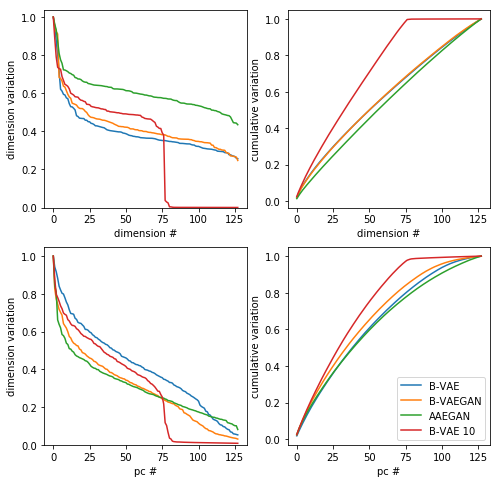

In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


model_dict = {'B-VAE': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-07-17:37:42',
             'B-VAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/2018-07-12-20:54:37',
             'AAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_aaegan/2018-07-13-22:33:39',
             'B-VAE 10': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-25-22:11:39'}


def plot_dim_variation(embeddings, legend_name = None):
    var_dims = np.sort(np.var(embeddings.numpy(), axis=0))[::-1]

    pca = PCA()
    pca.fit(embeddings)
    pca_var_dims = pca.singular_values_
    

    plt.subplot(2, 2, 1)
    plt.plot(var_dims/np.max(var_dims), label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('dimension variation')
    plt.ylim(0)


    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(var_dims)/np.sum(var_dims), label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('cumulative variation')
    
    plt.subplot(2, 2, 3)
    plt.plot(pca_var_dims/np.max(pca_var_dims), label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 4)
    plt.plot(np.cumsum(pca_var_dims)/np.sum(pca_var_dims), label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('cumulative variation')
    plt.legend()
    
plt.figure(figsize=(8, 8))    

for name in model_dict:
    model_path = model_dict[name]
    model_type = os.path.basename(os.path.split(model_path)[0])
    embeddings = torch.load(os.path.join(model_path, 'ref_model/embeddings.pkl'))
    plot_dim_variation(embeddings['test'], legend_name = name)

